<span style="font-size: 20px; font-weight: bold;">Assignment2-22111404</span>


<span style="font-size: 16px; font-weight: bold;">Question-1</span>


<span style="font-size: 14px; font-weight: bold;">1.A</span>


I have sucessfully installed **Wifi Analyzer** App in my smart phone and it was able to identify my wifi-AP and collect the RSSI.The RSSI values Connection Video link:https://github.com/Kriti2019/CS724/blob/main/RSSI%20values%20collection.mp4
The time graph generation video in the app is uploaded here:https://github.com/Kriti2019/CS724/blob/main/Time%20Graph%20Generation.mp4

The Time Graph is as follows:


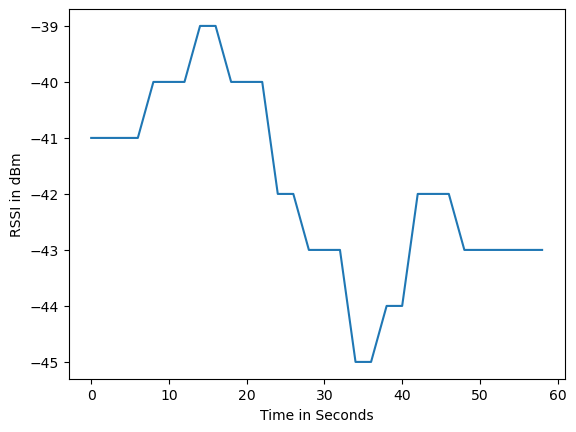

In [57]:

#Plotting the Time Graph
import numpy as np
import matplotlib.pyplot as plt
import math

time = np.arange(0,60,2)
#Received signal strength (Dbm)values are stored in Rssi in python list
Rssi= np.array([-41,-41,-41,-41,-40,-40,-40,-39,-39,-40,-40,-40,-42,-42,-43,-43,-43,-45,-45,-44,-44,-42,-42,-42,-43,-43,-43,-43,-43,-43])
print('The Time Graph is as follows:')
plt.xlabel('Time in Seconds')
plt.ylabel('RSSI in dBm')
plt.plot(time, Rssi)
plt.show()


<span style="font-size: 14px; font-weight: bold;">1.B</span>

As per the given instructions, I have used my AP as a transmitter and my smartphone as a receiver.Then,Varied the
distance in between these transceivers and at every positions recorded ~5-10 RSSI samples at different smartphone orientations.Here is the whole procedure's video link https://github.com/Kriti2019/CS724/blob/main/RSSI%20with%20Distance.zip
The AP is :iitk(c0:25:5c:55:0d:30)

<span style="font-size: 14px; font-weight: bold;">1.C</span>

The log-Graph is as follows:


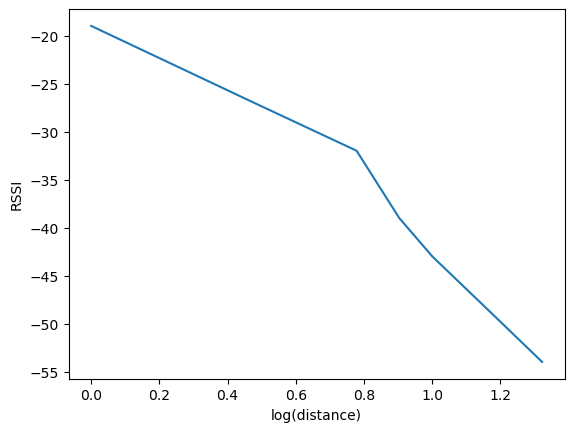

In [58]:
#plotting the log  graph
#I have stored the distances in meters in a distance_Vector python list
distance=[1,3,6,8,10,15,21]
#Taking log of each value of distance
logdistance= np.log10(distance)
RssiVal=np.array([-19,-27,-32,-39,-43,-49,-54])
print('The log-Graph is as follows:')
plt.xlabel('log(distance)')
plt.ylabel('RSSI')
plt.plot(logdistance, RssiVal)


<span style="font-size: 14px; font-weight: bold;">1.D</span>

The slope value is: -26.88270266465747
The absolute value of Path Loss Exponent is:  2.688270266465747
The Best fit straight line corresponding to the log-log plot is as follows:


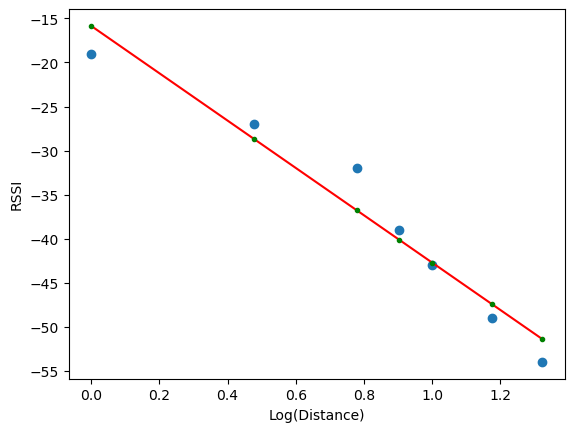

In [59]:
#Drawing the Best fit straight line corresponding to the log-log plot 


Slope,intercept = np.polyfit(logdistance,RssiVal,1)
y_line= Slope*logdistance + intercept
print('The slope value is:',Slope)
E=abs(Slope/10)
print("The absolute value of Path Loss Exponent is: ", E)
plt.plot(logdistance,y_line,'r')
plt.scatter(logdistance,RssiVal)
plt.xlabel("Log(Distance)")
plt.ylabel("RSSI")
X=np.asarray(logdistance)
bestFit=Slope*X+intercept
plt.plot(X,bestFit,'g.')
print('The Best fit straight line corresponding to the log-log plot is as follows:')




<span style="font-size: 14px; font-weight: bold;">1.E</span>

In [60]:
#Finding the variance w.r.t the Best Fit line graph 
Difference=y_line-RssiVal
Sqr_Difference=Difference**2
Variance=np.mean(Sqr_Difference)
print('The Variance Value is :',Variance)

The Variance Value is : 6.565031159053766


<span style="font-size: 16px; font-weight: bold;">Question-2</span>

<span style="font-size: 14px; font-weight: bold;">2.A</span>

<a href="https://github.com/Kriti2019/CS724/blob/main/Q2_CS724.jpeg">Please,Click the to check the Calculation of d</a>


In [78]:
#Finding out the distance/range from the path loss exponent that I have found in the last step
#I have provided the link of the calculation's picture
# Taking variables and values as given / measured
d0 = 1 # given in meter
Pr_d0 = -30 # measured in dbm (-ve)
Pr_d = -40 # measured in dbm (-ve)
# As calculated above
n = E
# After simplifying the formula taught in class we have pow((d/d0),n) = 13 absolute value
d = math.pow((10 * math.pow(d0,n)),(1/n))
print ("\n\n The Estimated distance is : ",d," meters\n")





 The Estimated distance is :  2.3549755793780283  meters



<span style="font-size: 14px; font-weight: bold;">2.B</span>

In [79]:
#Finding out the Average Error
print('The errors in range/distance due to noise are:\n ')
#I am considering first 5 distances
Error=0
for i in range(0,5):
    Numerator=RssiVal[0]-RssiVal[i]
    Denominator=10*E
    Expected_Value=Numerator/Denominator
    Estimated_Distance=1*pow(10,Expected_Value)
    Error=Error+abs(Estimated_Distance-distance[i])
Average_Error=Error/5
print(Average_Error)

The errors in range/distance due to noise are:
 
1.7225630975019695


 Observation : This experiment aimed to explore indoor localization using Wi-Fi Access Points (APs). Data was collected from ten distinct locations, each with four orientations: North, South, East, and West, totaling 40 data points of Received Signal Strength Indicator (RSSI) values.

We analyzed the data using Python, plotting it on a log-log scale and performing linear regression to determine the best-fit line. The results revealed that RSSI values exhibited frequent fluctuations due to factors like user orientation, indoor obstacles, user movement, and the presence of metallic objects.

While user localization using Wi-Fi APs can be error-prone, there are techniques available to improve accuracy. In a separate part of the experiment, RSSI values were measured at a distance from the Wi-Fi AP, and user-AP distance was calculated using a taught formula. Remarkably, the results showed a minimal error of approximately 1.7 meter